In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report, recall_score, precision_score, f1_score

from sklearn.linear_model import LogisticRegression

In [73]:
df = pd.read_csv('../data/reviews_with_ratings_cleaned.csv', index_col = 'Unnamed: 0')
df.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,avg_rating,avg_score_below_4,avg_score_below_5th_percentile,comments_clean
43584,5903980,722464484053280916,2022-09-23,12540615,Adam,"Lovely home! Has everything you need to feel comfortable, and Anne & Todd are so thoughtful, particularly to the little details that make the apartment feel like your home. The location was also amazing. Beautiful residential area, within steps of active areas in Georgetown.",4.975714,0,0,lovely home has everything you need to feel comfortable and anne todd are so thoughtful particularly to the little details that make the apartment feel like your home the location was also amazing beautiful residential area within steps of active areas in georgetown
99016,16381317,469386794,2019-06-14,184376036,Inacio,John was a wonderful host since we had our first ever Airbnb experience. The room was much better then we expected. The amenities and details to use the kitchen and other facilities were as descriptive and easy to use. <br/>We travelled with little girl and family. It was home away from home for us. We recommend this place for families.,4.912857,0,0,john was a wonderful host since we had our first ever airbnb experience the room was much better then we expected the amenities and details to use the kitchen and other facilities were as descriptive and easy to use br we travelled with little girl and family it was home away from home for us we recommend this place for families
230914,42882117,973979008830174358,2023-09-05,187258645,Beth,Wonderful stay in the heart of Cathedral Heights.,4.857143,0,0,wonderful stay in the heart of cathedral heights
304251,733857601151234603,856590216275870437,2023-03-27,498156590,Danny,"The property was nice and clean. Everything was as described. This was my first Airbnb so I was not sure what to expect during the check in. My guest arrived before I did, and they met with Glorie. The check in was smooth. My guest we were given the access code upon arrival and I received it via text. I would stay here again.",4.788571,0,0,the property was nice and clean everything was as described this was my first airbnb so i was not sure what to expect during the check in my guest arrived before i did and they met with glorie the check in was smooth my guest we were given the access code upon arrival and i received it via text i would stay here again
91414,15522091,586871733646229318,2022-03-20,33891628,Maria,Great stay and location!!,4.915714,0,0,great stay and location


#### Why are nulls appearing when the data I exported had no nulls?

In [74]:
df.isnull().sum()

listing_id                          0
id                                  0
date                                0
reviewer_id                         0
reviewer_name                       0
comments                            0
avg_rating                          0
avg_score_below_4                   0
avg_score_below_5th_percentile      0
comments_clean                    658
dtype: int64

#### It appears the nulls are ones where the original comment is punctuation (like emojis or someone entering some periods to avoid leaving a more detailed review).

In [75]:
df[df['comments_clean'].isnull()]

,listing_id,id,date,reviewer_id,reviewer_name,comments,avg_rating,avg_score_below_4,avg_score_below_5th_percentile,comments_clean
2605,164069,994986239709267669,2023-10-04,35468785,Will,.,4.805714,0,0,NaN
4481,409582,522084295,2019-09-01,272060022,Jeremy,...,4.907143,0,0,NaN
5572,453315,133105588,2017-02-20,7378994,Krista,.,4.902857,0,0,NaN
5757,453315,314218749,2018-08-26,108574837,Arturo,:),4.902857,0,0,NaN
6826,561697,552357224,2019-10-21,85027190,Tommy,.,4.807143,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
321446,1026903574614173477,1118138237236527092,2024-03-22,132766183,Ralph,.,4.937143,0,0,NaN
321454,1027268938275282966,1048611766982681320,2023-12-17,503133247,Warren,.,4.284286,0,1,NaN
321845,1045675242538231550,1108010487914928717,2024-03-08,550683559,Demarco,..,4.691429,0,0,NaN
322256,1079228981971974460,1099322701755911622,2024-02-25,508300199,Cesar,👍,4.554286,0,0,NaN


In [76]:
# Had to reimport with Keep default na as false: https://stackoverflow.com/questions/71191403/unable-to-read-text-from-csv-into-dataframe-when-text-is-null-and-nan

df = pd.read_csv('../data/reviews_with_ratings_cleaned.csv', index_col = 'Unnamed: 0', keep_default_na = False)
df.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,avg_rating,avg_score_below_4,avg_score_below_5th_percentile,comments_clean
586,4197,70043150,2016-04-15,7881708,Nathan,"Wonderful, accommodating and wonderfully located. As long as you use it they way it is intended, it works great!",4.944286,0,0,wonderful accommodating and wonderfully located as long as you use it they way it is intended it works great
230020,42588777,766206924,2021-06-04,9502113,Margaret,Great small space for a few days. Bed was comfortable and chocolates and shampoos were a nice touch.,4.768571,0,0,great small space for a few days bed was comfortable and chocolates and shampoos were a nice touch
45234,6247860,701728355,2020-10-18,276423218,Ruth,"better than the pictures show, new dark wood floors were not in the pictures but they looked so nice!!! everything was super clean. plenty of dishes and mugs and a nice coffee maker with coffee and cream supplied. very close to downtown which is exactly what we needed!! next time we come to DC we are for sure going to try to get this place again! Marc was very kind and helpful and when my airb...",4.710000,0,0,better than the pictures show new dark wood floors were not in the pictures but they looked so nice everything was super clean plenty of dishes and mugs and a nice coffee maker with coffee and cream supplied very close to downtown which is exactly what we needed next time we come to dc we are for sure going to try to get this place again marc was very kind and helpful and when my airbnb app wa...
110734,17172878,365692596,2019-01-01,81876786,Destiny,"Wilson's place is clean, perfectly located blocks away from anything you'd ever need. There's a Metro Station, bus stop, Target, Starbucks, Chick-Fil-A, and more in walking distance. The only downside was the 3 story walk up. If you stay on the 3rd floor, pack light!",4.742857,0,0,wilson s place is clean perfectly located blocks away from anything you d ever need there s a metro station bus stop target starbucks chick fil a and more in walking distance the only downside was the 3 story walk up if you stay on the 3rd floor pack light
229855,42503052,789184683466101178,2022-12-24,128786062,Joshua,"Nice/comfortable place, quiet/peaceful neighborhood.",4.902857,0,0,nice comfortable place quiet peaceful neighborhood


In [77]:
df.shape

(322807, 10)

In [78]:
df.isnull().sum()

listing_id                        0
id                                0
date                              0
reviewer_id                       0
reviewer_name                     0
comments                          0
avg_rating                        0
avg_score_below_4                 0
avg_score_below_5th_percentile    0
comments_clean                    0
dtype: int64

In [35]:
print(df['avg_score_below_4'].value_counts()),
print('*'*30)
df['avg_score_below_4'].value_counts(normalize = True)

avg_score_below_4
0    322629
1       178
Name: count, dtype: int64
******************************


avg_score_below_4
0    0.999449
1    0.000551
Name: proportion, dtype: float64

#### Creating X and y and doing train-test-split

In [36]:
X = df['comments_clean']
X.shape

(322807,)

In [37]:
y = df['avg_score_below_4']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

#### Running another TFIDF Vectorizer over a logistic regression, but this time setting the Logistic Regression to be balanced classes

In [39]:
pipe = Pipeline([
    ('tf', TfidfVectorizer() ),
    ('logr', LogisticRegression(class_weight = 'balanced') )
])

In [40]:
pipe_params = {
    'tf__stop_words' : ['english'],
    'tf__max_features' : [5_000, 10_000, 30_000], #Dropped the 60k max features
    'tf__min_df' : [2 ,5, 10, 25], # Minimum number of times a word needs to appear
    'tf__ngram_range' : [ (1,1), (1,2), (1,3) ]
    # logr__class_weight
}

In [41]:
gs = GridSearchCV(pipe, pipe_params, n_jobs = -1, 
                  verbose = 10)

In [42]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\david\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('logr',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'tf__max_features': [5000, 10000, 30000],
                         'tf__min_df': [2, 5, 10, 25],
                         'tf__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'tf__stop_words': ['english']},
             verbose=10)

#### Best score is 0.988 - worse than the baseline

In [43]:
gs.best_score_

0.9883521612523491

In [67]:
gs.best_score_ - df['avg_score_below_4'].value_counts(normalize = True)[0]

-0.011096425674204435

#### Best params are 30k max_features, 10 on min_df, n_gram range of 1,3

In [44]:
gs.best_params_

{'tf__max_features': 30000,
 'tf__min_df': 10,
 'tf__ngram_range': (1, 3),
 'tf__stop_words': 'english'}

In [45]:
prob_df = pd.DataFrame(gs.predict_proba(gs.best_estimator_.named_steps.tf.get_feature_names_out() ), columns = ['above_4_rating', 'below_4_rating'])
prob_df

,above_4_rating,below_4_rating
0,0.676007,0.323993
1,0.278801,0.721199
2,0.456115,0.543885
3,0.254497,0.745503
4,0.679094,0.320906
...,...,...
29995,0.741990,0.258010
29996,0.725847,0.274153
29997,0.761526,0.238474
29998,0.807425,0.192575


In [46]:
feature_words = pd.DataFrame( gs.best_estimator_.named_steps.tf.get_feature_names_out(), columns = ['features'])
feature_words

,features
0,00
1,00 pm
2,00am
3,10
4,10 10
...,...
29995,있어서
29996,있었습니다
29997,정말
29998,좋았습니다


In [48]:
word_probs = feature_words.join(prob_df)
word_probs.sort_values('above_4_rating', ascending = False).head(20)

,features,above_4_rating,below_4_rating
11484,great location,0.999999,9.643075e-07
11171,great,0.999994,5.551839e-06
15476,location,0.999949,5.131494e-05
20518,place great location,0.999927,7.270242e-05
20307,place clean,0.999913,8.668951e-05
11379,great host,0.999905,9.461933e-05
11533,great location great,0.999885,1.149428e-04
11505,great location close,0.999877,1.225192e-04
19882,perfect location,0.999851,1.490324e-04
11504,great location clean,0.999846,1.544655e-04


In [49]:
word_probs = feature_words.join(prob_df)
word_probs.sort_values('below_4_rating', ascending = False).head(20)

,features,above_4_rating,below_4_rating
21507,professionalism,0.000129,0.999871
16313,louise,0.000370,0.999630
9587,extending stay,0.000513,0.999487
17780,nat,0.000961,0.999039
22749,reservation,0.001642,0.998358
21099,pleasure,0.001655,0.998345
13928,issues checking,0.001687,0.998313
27497,todd,0.001710,0.998290
8740,echostage,0.001803,0.998197
29850,worst,0.002251,0.997749


In [63]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,avg_rating,avg_score_below_4,avg_score_below_5th_percentile,comments_clean
0,3686,131293,2010-11-01,257234,Callie,"Staying with Levita and her wonderful family was an amazing experience. They were so welcoming to me and her home was great. I cannot express enough how nice my experience was. Not only is Levita's home very close to the metro, extremely comfortable, but her vegan cooking was incredible as well. Anyone would be lucky to stay with such a friendly, welcoming family.",4.588571,0,0,staying with levita and her wonderful family was an amazing experience they were so welcoming to me and her home was great i cannot express enough how nice my experience was not only is levita s home very close to the metro extremely comfortable but her vegan cooking was incredible as well anyone would be lucky to stay with such a friendly welcoming family
1,3686,150766,2010-12-08,255888,Patrick,"Vita is a very welcoming, helpful and friendly host and a great cook. Her house is located in an interesting, not to say fascinating, area of Washington DC. Transport connections are close by and very frequent, the house (and the room where I stayed) are furnished in a very elegant style and I was always happy to come home in the evening to the friendly atmosphere of the household of Vita and ...",4.588571,0,0,vita is a very welcoming helpful and friendly host and a great cook her house is located in an interesting not to say fascinating area of washington dc transport connections are close by and very frequent the house and the room where i stayed are furnished in a very elegant style and i was always happy to come home in the evening to the friendly atmosphere of the household of vita and her two ...
2,3686,177749,2011-02-02,366688,Benjamin,"This was my first time using ""airbnb"" and it made me wonder why I ever stayed in hotels in the past!! Vita was the most incredible host. Her home was warm and inviting, full of beautiful artwork and artistic people. The bedroom was immaculately clean and comfortable. It felt like a vacation...I even started my morning with a hot, leisurely bath! Vita is a wonderful chef, and runs an awesome f...",4.588571,0,0,this was my first time using airbnb and it made me wonder why i ever stayed in hotels in the past vita was the most incredible host her home was warm and inviting full of beautiful artwork and artistic people the bedroom was immaculately clean and comfortable it felt like a vacation i even started my morning with a hot leisurely bath vita is a wonderful chef and runs an awesome food blog where...
3,3686,197451,2011-03-12,213492,T.J.,"First, Vita saved my work week by providing me with very very very last minute acomodations. Vita's home was an absolute urban oasis! I was absolutely comfortable with the private accomodations. I regret not being able to spend more time with Vita and her family. I had a wonderful stay and look forward to being a guest in the future.",4.588571,0,0,first vita saved my work week by providing me with very very very last minute acomodations vita s home was an absolute urban oasis i was absolutely comfortable with the private accomodations i regret not being able to spend more time with vita and her family i had a wonderful stay and look forward to being a guest in the future
4,3686,213212,2011-03-30,428455,Pete,"Great host! Very welcoming and organised. I stayed for three nights while sightseeing in D.C. - the location is very convenient and Vita provided maps and guides. The room is lovely, the shower is hot and Vita shared her tasty vegan cooking! Would happily stay again.",4.588571,0,0,great host very welcoming and organised i stayed for three nights while sightseeing in d c the location is very convenient and vita provided maps and guides the room is lovely the shower is hot and vita shared her tasty vegan cooking would happily stay again


#### Wanted to see the comments with professionalism

In [64]:
pd.set_option('display.max_colwidth', 400)
df[['avg_rating', 'avg_score_below_4', 'comments_clean']] [df['comments_clean'].str.contains('professionalism')].sort_values('avg_rating')

,avg_rating,avg_score_below_4,comments_clean
235396,3.928571,1,okay so two things wrong right off the bat the room i booked did not look like the pictures it looks like they were renovating when i walked in there were construction workers downstairs setting up the communal living room the bed didn t look like the pictures nor the bathroom either way it was clean and simple br br br my other issue was that my room had a shared bathroom with the other guest...
294829,3.955714,1,we had an great experience with our accommodations thank you for you ll professionalism
224599,4.507143,0,when we arrived to check in the staff member that was on duty was either extremely drunk or on drugs there were approximately a dozen people waiting in the lobby to be checked in while the staff member stared at his computer and mumbled things under his breath some guests had to check themselves in once we were finally checked in the staff member showed us to our rooms which were in a differen...
224653,4.520000,0,overall i was happy that i stayed at duo housing i will stay here again i want to leave a complaint that i hope is used to help one of their employees br there is an employee who would not give me or any other paying guest his name that is incredibly awkward and exhibits the worst hospitality i ve ever encountered i walked into my room one day to find another guest almost steaming from frustra...
224065,4.564286,0,location 5 5 accommodating 5 5 price can t beat it br was overall impressed by the staff finding a balance between professionalism and remaining down to earth
317827,4.571429,0,the hosts are not good customer service representatives they are machines amazing assistance expectation management professionalism every single airbnb host should be like them the property is really nice well equipped spotlessly clean and the parking space is huge and protected br the negatives are the lack of control of temperature you are at the mercy of the folks renting the upper side of ...
28046,4.577143,0,lakeisha is a great host check in was easy lakeisha is by far the most responsive host i ve ever had responding to messages sometimes within minutes and always within an hour even while out of town and she dealt with some challenging aspects of our stay with true dedication and professionalism the space is good if you are looking for something basic with a good location within walking distance...
299595,4.601429,0,paul is a stellar host extremely friendly helpful and responsive you can tell he takes pride in his work and exudes a great sense of professionalism as well br the place is beautiful and well worth the price it is perfect size for 3 4 people and it felt very secure br thank you paul
318683,4.630000,0,this was an amazing place to stay if you are ever looking to visit washington this little air bnb provide professionalism and holds customer satisfaction to a high standard i would highly recommend clean open friendly definitely stay here in the future
16155,4.657143,0,joe was amazing very friendly extremely helpful he also suggested amazing things to do he referred me to a airbnb experience where we learn how to open crabs and eat seafood i had a wonderful time as a business owner and traveler for business i look for specific professionalism and joe exceeded that by far thank you again


In [72]:
len ( df[['avg_rating', 'avg_score_below_4', 'comments_clean']] [df['comments_clean'].str.contains('professionalism')].sort_values('avg_rating') )

49

In [65]:
pd.set_option('display.max_colwidth', 400)
df[['avg_rating', 'avg_score_below_4', 'comments_clean']] [df['comments_clean'].str.contains('louise')].sort_values('avg_rating')

,avg_rating,avg_score_below_4,comments_clean
25842,3.881429,1,louise s charming old house is located in silent neighborhood close to many good restaurants and she was a kind host br i was sleeping in the open space room which is more like a hallway to other rooms in top floor it was ok for few nights but don t expect much privacy
25846,3.881429,1,louise is a great host who will answer every question and help you with every need the room is exactly as pictured it is clean and spacious the house itself has shared rooms with the other guests which enables you to meet and interact with them which is great
25845,3.881429,1,this is the best airbnb experience i ever had louise s house is spotless and comfortable louise host me very friendly and generous treat ms like a family member here if you re looking for somewhere to stay as comfortable as home please choose louise s house
25844,3.881429,1,it wasn t the worst place i ve ever been the room was cramped and shared with another guest that payed a different cheaper rate than the one listed here louise is a sweet person she is very welcoming and does her best to make you feel at home she sometimes cooks dinner for the house and that is very nice hours of activity are very erratic in the house host is up at all hours of the night many ...
25819,4.451429,0,nice stay louise was a great host we were constantly in contact even if had no chances to meet the conference center is walking distance from there br recommended
...,...,...,...
254141,4.932857,0,louise s place is lovely and i stayed for 2 weeks comfortable bed nice hot shower and functional kitchen all as described clean and compact quiet neighborhood very close to rock creek park trails for those interested in forest walks a bit further to public transport easy parking for those with cars wonderful a c during a hot sticky week which was much appreciated
254144,4.932857,0,this spot was perfect for the work that i had in the neighborhood so beautifully appointed the space was clean quaint and wonderful for the 3 nights that i stayed louise was great to communicate with and was very helpful in arranging things for my stay
254115,4.932857,0,i really loved staying in this beautifully appointed space i wish i could hire louise to help my wife and i decorate this little space is cozy and very attractively decorated with thoughtfully selected appliances and tools for the traveller like a washer dryer dish washer dishes utensils plenty of storage and place to hang clothes etc the location near rock creek park is just awesome if you al...
10007,4.960000,0,day one having left our wonderful hosts rose and billy and we are already missing them br their generosity friendship and spirit was overwhelming our experience was only described as first class we loved every second with this wonderful couple br in terms of proximity to public transport restaurants shopping not to mention the key d c attractions was excellent rose and billy were extremely hel...


In [68]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.9875012907622726, 0.9858367822358801)

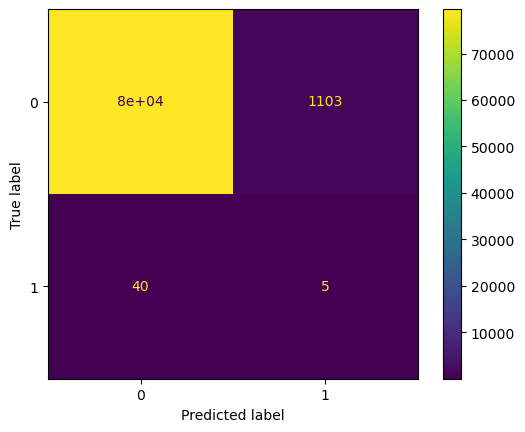

In [71]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test)

In [80]:
recall_score(y_test, gs.predict(X_test))

0.1111111111111111

#### Overpredicting false positives

#### Issue may be classes are so imbalanced it's hard to beat the majority class. My model would need to be near perfect to beat the majority class.

#### Next step will try to see if I can predict poor listings based on those below the 5th percentile in average rating